# Generating Synthetic data using the existing GHSL urban data

*GHSL* data is good quality data source but the data is recorded every 5 years and we'd like to have urban area for every year from 2000 to 2024

In [ ]:
import pandas as pd
import numpy as np

First cleaning the inital GHSL dataset and getting data just for Addis ababa and kampala

In [ ]:
# If you don't have openpyxl installed, uncomment the next line and run this cell:
# !pip install openpyxl

df_urban_excel = pd.read_excel("GHSL_excel.xlsx", engine="openpyxl")
display(df_urban_excel.head())

,ID_UC_G0,GC_UCN_MAI_2025,GC_CNT_GAD_2025,GC_UCA_KM2_2025,GC_POP_TOT_2025,GC_DEV_WIG_2025,GC_DEV_USR_2025,GH_BUS_TOT_1975,GH_BUS_TOT_1980,GH_BUS_TOT_1985,...,GH_XST_D30_2020,GH_XST_D11_2025,GH_XST_D12_2025,GH_XST_D13_2025,GH_XST_D21_2025,GH_XST_D22_2025,GH_XST_D23_2025,GH_XST_D30_2025,GH_L30_2025,GH_W30_2025
0,1,Apia,Samoa,35,60041.65661,Lower Middle,Oceania,1984866,2284807,2600248,...,0.000000,0,0,0,0,0,0,2296.099859,26.149410,8.850590
1,2,Nuku'alofa,Tonga,20,51990.76620,Upper Middle,Oceania,1700175,1921455,2142709,...,0.000000,0,0,0,0,0,0,3941.202447,13.191600,6.808400
2,3,Ewa Beach,United States,15,53720.65818,High income,Northern America,1366457,1479787,1614928,...,0.000000,0,0,0,0,0,0,4038.838093,13.301018,1.698982
3,4,Papeete,French Polynesia,50,109747.12570,High income,Oceania,4777697,4971229,5169050,...,3133.736897,0,0,0,0,0,0,3164.193895,34.684071,15.315929
4,5,Rosarito,México,29,76707.05999,Upper Middle,Latin America and the Caribbean,2840846,2925776,3011006,...,3358.396133,0,0,0,0,0,0,2977.696697,25.760535,3.239465


In [ ]:
# Filter the DataFrame for 'Addis Ababa' or 'Kampala' in the 'GC_UCN_MAI_2025' column
df_filtered = df_urban_excel.loc[
    df_urban_excel["GC_UCN_MAI_2025"].isin(["Addis Ababa", "Kampala"])
]

# Display the filtered DataFrame
display(df_filtered.head())

,ID_UC_G0,GC_UCN_MAI_2025,GC_CNT_GAD_2025,GC_UCA_KM2_2025,GC_POP_TOT_2025,GC_DEV_WIG_2025,GC_DEV_USR_2025,GH_BUS_TOT_1975,GH_BUS_TOT_1980,GH_BUS_TOT_1985,...,GH_XST_D30_2020,GH_XST_D11_2025,GH_XST_D12_2025,GH_XST_D13_2025,GH_XST_D21_2025,GH_XST_D22_2025,GH_XST_D23_2025,GH_XST_D30_2025,GH_L30_2025,GH_W30_2025
1676,1711,Kampala,Uganda,810,5177877.659,Low income,Sub-Saharan Africa,55830185,63997937,75021291,...,5764.262279,0,0,0,0,0,0,6589.799375,785.741320,24.258680
5698,5862,Addis Ababa,Ethiopia,465,7280462.518,Low income,Sub-Saharan Africa,38390364,43537648,50733048,...,12699.934590,0,0,0,0,0,0,15695.650330,463.852237,1.147763


In [ ]:
# filter for data from 2000-2025
required_dates = [
    "GC_UCN_MAI_2025",
    "GH_BUS_TOT_2000",
    "GH_BUS_TOT_2005",
    "GH_BUS_TOT_2010",
    "GH_BUS_TOT_2015",
    "GH_BUS_TOT_2020",
    "GH_BUS_TOT_2025",
]
df_urban_filtered_dates = df_filtered[
    [col for col in required_dates if col in df_filtered.columns]
]
display(df_urban_filtered_dates)

,GC_UCN_MAI_2025,GH_BUS_TOT_2000,GH_BUS_TOT_2005,GH_BUS_TOT_2010,GH_BUS_TOT_2015,GH_BUS_TOT_2020,GH_BUS_TOT_2025
1676,Kampala,119249651,131236308,145524215,159408771,163802820,166706125
5698,Addis Ababa,74448893,83318084,93662400,103631719,108444308,110396125


In [ ]:
df_melted = pd.melt(
    df_urban_filtered_dates,
    id_vars=["GC_UCN_MAI_2025"],
    var_name="Year",
    value_name="Urban_Area",
)

# Extract the year as an integer from the 'Year' column
df_melted["Year"] = df_melted["Year"].str.extract("(\d{4})").astype(int)
df_melted.rename(columns={"GC_UCN_MAI_2025": "Cities"}, inplace=True)
df_melted.head()

,Cities,Year,Urban_Area
0,Kampala,2000,119249651
1,Addis Ababa,2000,74448893
2,Kampala,2005,131236308
3,Addis Ababa,2005,83318084
4,Kampala,2010,145524215


In [ ]:
from itertools import product

# Create a complete list of years from 2000 to 2026
all_years = pd.DataFrame({"Year": range(2000, 2026)})

# Create a DataFrame with all combinations of cities and years
all_combinations = pd.DataFrame(
    list(product(df_melted["Cities"].unique(), all_years["Year"])),
    columns=["Cities", "Year"],
)

# Merge with the melted DataFrame to get the existing data points
df_yearly = pd.merge(all_combinations, df_melted, on=["Cities", "Year"], how="left")

# Create the 'is_synthetic' column based on NaN values before interpolation
df_yearly["is_synthetic"] = df_yearly["Urban_Area"].isnull()

# Sort the DataFrame by city and year
df_yearly = df_yearly.sort_values(by=["Cities", "Year"])

# Interpolate the missing urban area values for each city
df_yearly["Urban_Area"] = df_yearly.groupby("Cities")["Urban_Area"].transform(
    lambda x: x.interpolate(method="spline", order=3)
)

# Add Gaussian noise to synthetic data points
noise_mean = 0
noise_std_dev = (
    df_yearly["Urban_Area"].std() * 0.05
)  # You can adjust the multiplier to control the amount of noise

synthetic_indices = df_yearly[df_yearly["is_synthetic"]].index
noise = np.random.normal(noise_mean, noise_std_dev, size=len(synthetic_indices))
df_yearly.loc[synthetic_indices, "Urban_Area"] = (
    df_yearly.loc[synthetic_indices, "Urban_Area"] + noise
)


# Display the DataFrame with interpolated data and noise
display(df_yearly.head())
display(df_yearly.tail())

,Cities,Year,Urban_Area,is_synthetic
26,Addis Ababa,2000,7.444889e+07,False
27,Addis Ababa,2001,7.513142e+07,True
28,Addis Ababa,2002,7.831445e+07,True
29,Addis Ababa,2003,7.859030e+07,True
30,Addis Ababa,2004,7.923104e+07,True


,Cities,Year,Urban_Area,is_synthetic
21,Kampala,2021,1.646294e+08,True
22,Kampala,2022,1.670644e+08,True
23,Kampala,2023,1.659804e+08,True
24,Kampala,2024,1.636979e+08,True
25,Kampala,2025,1.667061e+08,False


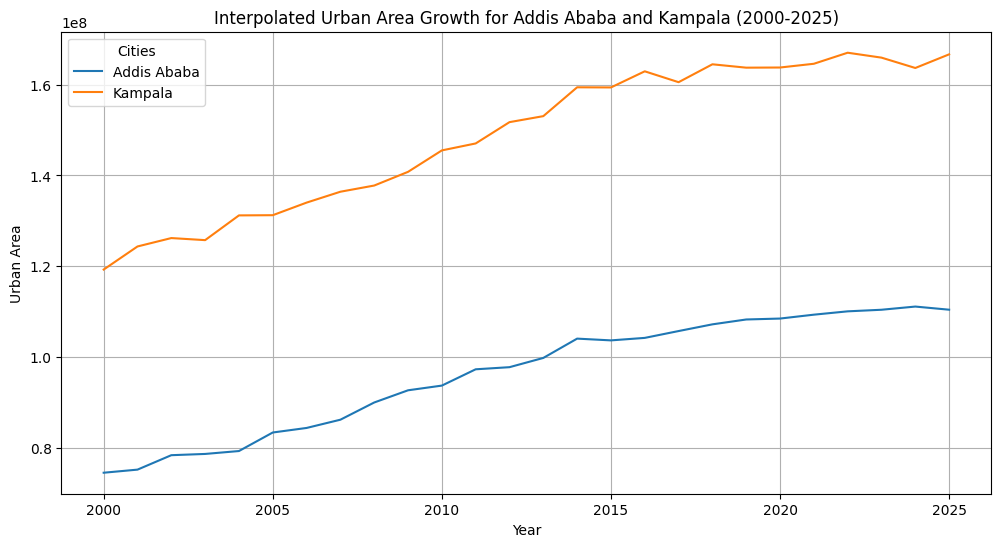

In [ ]:
# prompt: visualize the output

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the interpolated data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yearly, x="Year", y="Urban_Area", hue="Cities")
plt.title("Interpolated Urban Area Growth for Addis Ababa and Kampala (2000-2025)")
plt.xlabel("Year")
plt.ylabel("Urban Area")
plt.grid(True)
plt.show()

In [ ]:
# download the generated dataset
df_yearly.to_csv("generated_data.csv", index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>